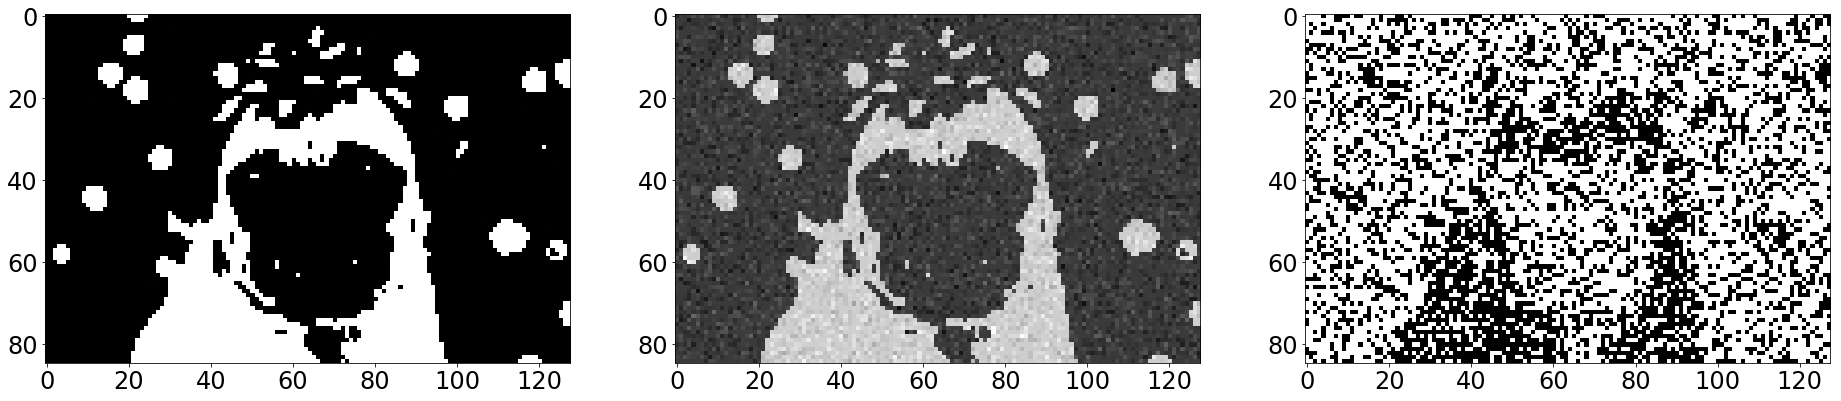

In [2]:
import numpy as np
# np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.misc import imread
from itertools import product
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

def add_gaussian_noise(im, prop, varSigma):
    N = int(np.round(np.prod(im.shape) * prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N], im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im)
    im2[index] += e[index]
    return im2

def add_saltnpeppar_noise(im, prop):
    N = int(np.round(np.prod(im.shape) * prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N], im.shape)
    im2 = np.copy(im)
    im2[index] = 1 - im2[index]
    return im2

# proportion of pixels to alter
prop = 0.7
varSigma = 0.1
im = imread('pug.jpg')
im = im / 255

fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im, cmap='gray')

im2 = add_gaussian_noise(im,prop,varSigma)
ax2 = fig.add_subplot(132)
ax2.imshow(im2, cmap='gray')

im3 = add_saltnpeppar_noise(im,prop)
ax3 = fig.add_subplot(133)
ax3.imshow(im3,cmap='gray')

plt.show()

In [ ]:
def neighbours(i, j, M, N, size = 4):
    if size == 4:
        if (i == 0 and j == 0):
            n = [(0,1), (1,0)]
        elif (i == 0 and j == N-1):
            n = [(0,N-2), (1,N-1)]
        elif (i == M-1 and j==0):
            n = [(M-1,1), (M-2,0)]
        elif (i == M-1 and j == N-1):
            n = [(M-1,N-2), (M-2,N-1)]
        elif (i == 0):
            n = [(0,j-1), (0,j+1), (1,j)]
        elif (i == M-1):
            n = [(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif (j == 0):
            n = [(i-1,0), (i+1,0), (i,1)]
        elif (j == N-1):
            n = [(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n = [(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
        return n
    if size == 8:
        print('Not yet implemented\n')
        return -1

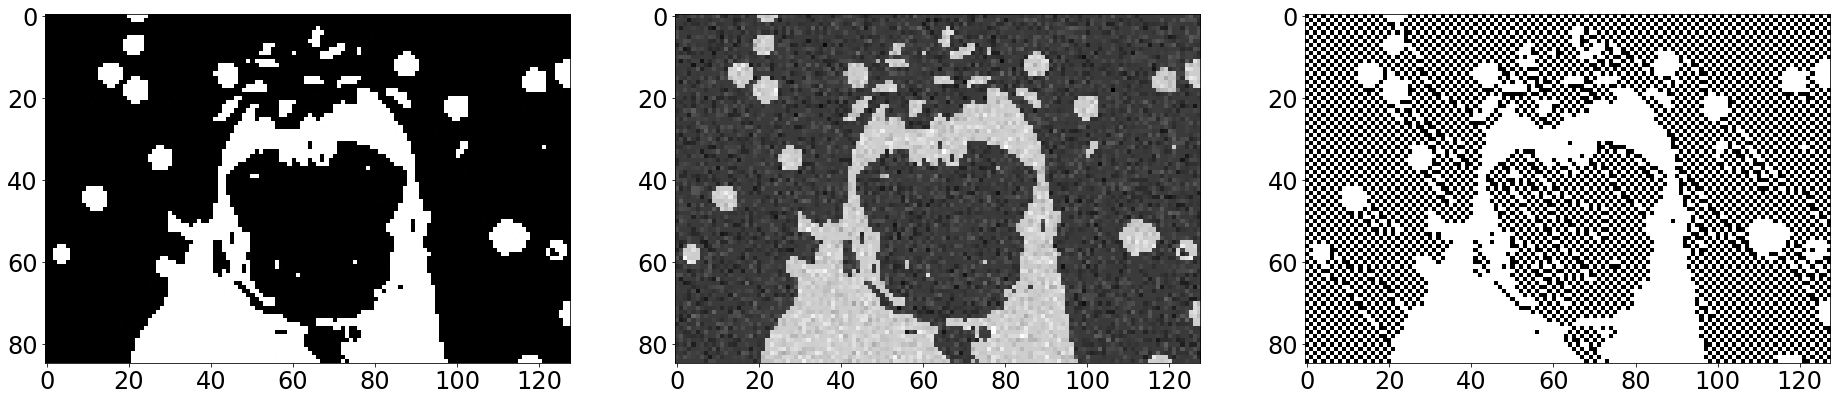

In [ ]:
def icm(img):
    shape = img.shape
    NUM_OF_ITER = 80
    beta = 1
    eta = 2.1
    xPrev = np.copy(img)
    
    x = np.copy(img)
    for t in range(NUM_OF_ITER):
        for (i, j), x_i in np.ndenumerate(x):
            neigh = neighbours(i, j, shape[0], shape[1], size=4)
            neigh = list(map((lambda t: x[t[0]][t[1]]), neigh))
            energy1 = - beta * np.sum(1 * neigh) - eta * (1 * xPrev[i][j])
            energy2 = - beta * np.sum(-1 * neigh) - eta * (-1 * xPrev[i][j])
            if energy1 > energy2:
                x[i][j] = 1
            else:
                x[i][j] = -1
        xPrev = np.copy(x)
#         if (np.array_equal(x, xPrev)):
#             break;
    
    return (x + 1) / 2

x = icm(im2)

fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im, cmap='gray')

ax2 = fig.add_subplot(132)
ax2.imshow(im2, cmap='gray')

ax3 = fig.add_subplot(133)
ax3.imshow(x, cmap='gray')

plt.show()

x2 = icm(im3)

fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im, cmap='gray')

ax2 = fig.add_subplot(132)
ax2.imshow(im3, cmap='gray')

ax3 = fig.add_subplot(133)
ax3.imshow(x2, cmap='gray')

plt.show()